In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [8]:
path = 'yelp_data/health_text_sentiment.csv'

In [9]:
df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)


df = df[['stars',
 'text']]

In [10]:
data = df.ix[np.where((df.stars==1)|(df.stars==5))]
# data.stars.replace(1,0,inplace=True)
# data.stars.replace(5,1,inplace=True)

data.head()

,stars,text
0,1,Please stay away from this place if you can! I...
1,5,My husband has been a patient of Dr. Byrne for...
4,1,I wish I could give 0 stars. Worst office I've...
5,1,I went to the emergency room because i was hav...
6,5,Dr. Byrne is an excellent doctor with all the ...


In [13]:
# split
X = data['text'].values.astype(str)
y = data['stars'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)


In [11]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [15]:

count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [55]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

## Training models

In [56]:
mn_count_clf = MultinomialNB(alpha=0.1)

In [57]:
mn_count_clf.fit(count_train, y_train)
pred = mn_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.954


In [58]:
mn_tfidf_clf = MultinomialNB(alpha=0.1)

In [59]:
mn_tfidf_clf.fit(tfidf_train, y_train)
pred = mn_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.975


In [60]:
pa_tfidf_clf = PassiveAggressiveClassifier(n_iter=50)

In [61]:

pa_tfidf_clf.fit(tfidf_train, y_train)
pred = pa_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.983


In [62]:
svc_tfidf_clf = LinearSVC()

In [63]:

svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.982


In [64]:
sgd_tfidf_clf = SGDClassifier()

In [65]:
sgd_tfidf_clf.fit(tfidf_train, y_train)
pred = sgd_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.979


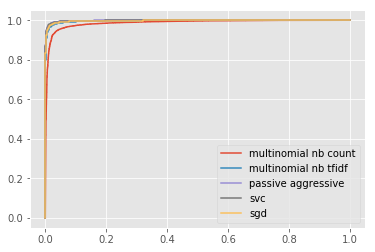

In [66]:
plt.figure(0).clf()

for model, name in [ (mn_count_clf, 'multinomial nb count'),
                     (mn_tfidf_clf, 'multinomial nb tfidf'),
                     (pa_tfidf_clf, 'passive aggressive'),
                     (svc_tfidf_clf, 'svc'),
                     (sgd_tfidf_clf, 'sgd')]:
    if 'count' in name:
        pred = model.predict_proba(count_test)[:,1]
    elif 'multinomial' in name:
        pred = model.predict_proba(tfidf_test)[:,1]
    else: 
        pred = model.decision_function(tfidf_test)
    fpr, tpr, thresh = metrics.roc_curve(y_test, pred, pos_label=5)
    plt.plot(fpr,tpr,label="{}".format(name))

plt.legend(loc=0)

In [67]:
name

'sgd'

In [37]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    
    Modified by @kjam to support a dict return.
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    return {class_labels[0]: topn_class1,
            class_labels[1]: topn_class2
    }


most_informative_feature_for_binary_classification(tfidf_vectorizer, pa_tfidf_clf, n=10)

{1: [(-8.868918721382219, 'rude'),
  (-8.531149517945448, 'unprofessional'),
  (-8.320329567401018, 'worst'),
  (-7.35570918774952, 'told'),
  (-5.890776760185712, 'wasted'),
  (-5.724530419972546, 'refused'),
  (-5.633761398358552, 'joke'),
  (-5.627305159449648, 'lack'),
  (-5.544778950450872, 'misdiagnosed'),
  (-5.460195928311238, 'poor')],
 5: [(6.244058569204327, 'excellent'),
  (6.751320967866611, 'fantastic'),
  (6.905440661291438, 'happier'),
  (6.918247580307658, 'thank'),
  (7.074785248296271, 'love'),
  (7.709379761429456, 'grateful'),
  (7.824207312590003, 'best'),
  (7.924695986560062, 'highly'),
  (8.036421149456531, 'great'),
  (8.81427246940512, 'amazing')]}

In [38]:

classifiers = [(mn_count_clf, count_vectorizer),
               (mn_tfidf_clf, tfidf_vectorizer),
               (pa_tfidf_clf, tfidf_vectorizer),
               (svc_tfidf_clf, tfidf_vectorizer),
               (sgd_tfidf_clf, tfidf_vectorizer)]

In [39]:
results = {}
for clf, vct in classifiers:
    results[clf] = most_informative_feature_for_binary_classification(vct, clf, n=10)

In [40]:
results

{MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True): {1: [(-16.03951662158489,
    '000s'),
   (-16.03951662158489, '00204'),
   (-16.03951662158489, '00a'),
   (-16.03951662158489, '01072'),
   (-16.03951662158489, '011'),
   (-16.03951662158489, '016'),
   (-16.03951662158489, '019'),
   (-16.03951662158489, '0200'),
   (-16.03951662158489, '03jun18'),
   (-16.03951662158489, '03pm')],
  5: [(-5.20759239863105, 'best'),
   (-5.1882202904580605, 'friendly'),
   (-5.033242172859351, 'recommend'),
   (-4.733726033283819, 'care'),
   (-4.711463965085306, 'doctor'),
   (-4.692633934638996, 'great'),
   (-4.680196984900482, 'office'),
   (-4.5595173220652185, 'time'),
   (-4.356586812864236, 'staff'),
   (-3.5939114605050246, 'dr')]},
 MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True): {1: [(-13.93679759986435,
    '000s'),
   (-13.93679759986435, '00204'),
   (-13.93679759986435, '00a'),
   (-13.93679759986435, '01072'),
   (-13.93679759986435, '011'),
   (-13.93679759986

In [42]:
comparable_results = {5: {}, 1: {}}
for clf, data in results.items():
    clf_name = clf.__class__.__name__
    for label, features in data.items():
        for rank, score_tuple in enumerate(features):
            if score_tuple[1] in comparable_results[label]:
                comparable_results[label][score_tuple[1]].append((rank + 1, clf_name))
            else:
                comparable_results[label][score_tuple[1]] = [(rank + 1, clf_name)]

In [47]:
comparable_results[1]


{'000s': [(1, 'MultinomialNB'), (1, 'MultinomialNB')],
 '00204': [(2, 'MultinomialNB'), (2, 'MultinomialNB')],
 '00a': [(3, 'MultinomialNB'), (3, 'MultinomialNB')],
 '01072': [(4, 'MultinomialNB'), (4, 'MultinomialNB')],
 '011': [(5, 'MultinomialNB'), (5, 'MultinomialNB')],
 '016': [(6, 'MultinomialNB'), (6, 'MultinomialNB')],
 '019': [(7, 'MultinomialNB'), (7, 'MultinomialNB')],
 '0200': [(8, 'MultinomialNB'), (8, 'MultinomialNB')],
 '03jun18': [(9, 'MultinomialNB'), (9, 'MultinomialNB')],
 '03pm': [(10, 'MultinomialNB'), (10, 'MultinomialNB')],
 'rude': [(1, 'PassiveAggressiveClassifier'),
  (1, 'LinearSVC'),
  (1, 'SGDClassifier')],
 'unprofessional': [(2, 'PassiveAggressiveClassifier'),
  (4, 'LinearSVC'),
  (6, 'SGDClassifier')],
 'worst': [(3, 'PassiveAggressiveClassifier'),
  (2, 'LinearSVC'),
  (3, 'SGDClassifier')],
 'told': [(4, 'PassiveAggressiveClassifier'),
  (3, 'LinearSVC'),
  (2, 'SGDClassifier')],
 'wasted': [(5, 'PassiveAggressiveClassifier')],
 'refused': [(6, 'Passi

In [48]:

agg_results = {}
for label, features in comparable_results.items():
    for feature, ranks in features.items():
        if feature in agg_results:
            print("WARNING! DUPLICATE LABEL!!! {}".format(feature))
        agg_results[feature] = {
            'label': label,
            'agg_rank': np.mean([r[0] for r in ranks]),
            'count': len(ranks)
        }

In [49]:
comparison_df = pd.DataFrame(agg_results).T


In [54]:
comparison_df = pd.DataFrame(agg_results).T



,agg_rank,count,label
best,5.000000,5.0,5.0
friendly,4.666667,3.0,5.0
recommend,3.000000,2.0,5.0
care,4.500000,2.0,5.0
doctor,3.500000,2.0,5.0
great,8.600000,5.0,5.0
office,5.500000,2.0,5.0
time,7.000000,2.0,5.0
staff,9.000000,2.0,5.0
dr,7.333333,3.0,5.0


In [51]:
comparison_df[comparison_df['label'] == 5].sort_values('count', ascending=0).head(10)


,agg_rank,count,label
best,5.000000,5.0,5.0
great,8.600000,5.0,5.0
dr,7.333333,3.0,5.0
amazing,9.333333,3.0,5.0
highly,4.666667,3.0,5.0
love,5.666667,3.0,5.0
thank,6.000000,3.0,5.0
friendly,4.666667,3.0,5.0
excellent,2.333333,3.0,5.0
staff,9.000000,2.0,5.0


In [52]:
comparison_df[comparison_df['label'] == 1].sort_values('count', ascending=0).head(10)


,agg_rank,count,label
told,3.000000,3.0,1.0
unprofessional,4.000000,3.0,1.0
worst,2.666667,3.0,1.0
rude,1.000000,3.0,1.0
said,7.000000,2.0,1.0
incompetent,9.000000,2.0,1.0
terrible,7.500000,2.0,1.0
horrible,4.500000,2.0,1.0
poor,9.500000,2.0,1.0
refused,6.000000,2.0,1.0


In [53]:
feature_names = count_vectorizer.get_feature_names()
for idx, ftr_weight in enumerate(sorted(zip(mn_count_clf.coef_[0], feature_names))):
    if ftr_weight[0] <= -16.067750538483136:
        continue
    print(idx, ftr_weight)
    break

0 (-16.03951662158489, '000s')
